In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow
from keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout

tf.config.run_functions_eagerly(True)

In [4]:
img_dir = "C:/Users/msi/Desktop/BrainTumorScan-main/BrainTumorScan-main/project/ML_Model/Brain Tumor Data Set"

In [5]:
BATCH_SIZE = 64
IMAGE_SIZE = 150
input_shape = (150,150,1)

In [6]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],  # Görüntü parlaklığını değiştir
    fill_mode='nearest'
)


In [7]:
train_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=True,
                                        class_mode = "binary",
                                        subset = "training")

Found 3340 images belonging to 2 classes.


In [8]:
val_gen = data_gen.flow_from_directory(img_dir,
                                        target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                        batch_size = BATCH_SIZE,
                                        color_mode= "grayscale",
                                        shuffle=False,
                                        class_mode = "binary",
                                        subset = "validation")

Found 834 images belonging to 2 classes.


In [9]:
labels = train_gen.class_indices
classes = list(labels.keys())

print(classes)

['Brain Tumor', 'Healthy']


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D ,BatchNormalization, Flatten, Dropout

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

model = Sequential()

# İlk konvolüsyonel katman
model.add(Conv2D(16, (3, 3), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# İkinci konvolüsyonel katman
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Üçüncü konvolüsyonel katman
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Dördüncü konvolüsyonel katman
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

# Özellikleri düzleştir
model.add(Flatten())

# Tam bağlantılı katman
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Çıkış katmanı (binary sınıflandırma)
model.add(Dense(1, activation='sigmoid'))

# Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model özeti
model.summary()


c:\Users\Msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 900,225 (3.43 MB)

 Trainable params: 900,225 (3.43 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 900,225 (3.43 MB)

 Trainable params: 900,225 (3.43 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
with tf.device('/device:GPU:0'):
    history = model.fit(
       train_gen,
        epochs=20,
        validation_data=val_gen,
        callbacks=[early_stop, reduce_lr]
    )

c:\Users\Msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


c:\Users\Msi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


53/53 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5305 - loss: 2.0268 - val_accuracy: 0.5372 - val_loss: 0.7671 - learning_rate: 0.0010
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 320ms/step - accuracy: 0.5829 - loss: 0.7245 - val_accuracy: 0.5624 - val_loss: 0.7179 - learning_rate: 0.0010
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 18s 329ms/step - accuracy: 0.6839 - loss: 0.6702 - val_accuracy: 0.6751 - val_loss: 0.6835 - learning_rate: 0.0010
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 324ms/step - accuracy: 0.7145 - loss: 0.6377 - val_accuracy: 0.6775 - val_loss: 0.6789 - learning_rate: 0.0010
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 324ms/step - accuracy: 0.7301 - loss: 0.6360 - val_accuracy: 0.7338 - val_loss: 0.6352 - learning_rate: 0.0010
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 325ms/step - accuracy: 0.7211 - loss: 0.6151 - val_accuracy: 0.6906 - val_loss: 0.6944 - learning_rate: 0.0010
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 327ms/step - accuracy: 0.7339 - loss: 0.5945 - val_acc

In [15]:
#train_loss, train_acc = model.evaluate(train_gen,steps_per_epoch = 3681//64,validation_steps = 919//64)
test_loss, test_acc   = model.evaluate(val_gen)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.8198 - loss: 0.4906


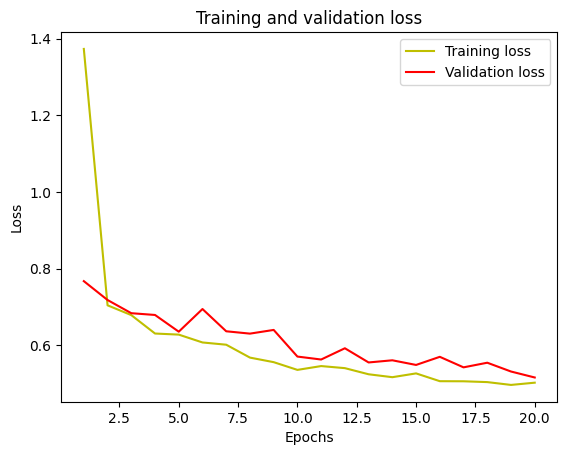

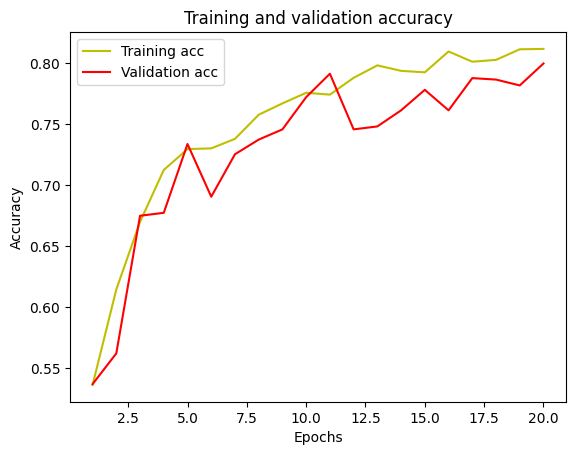

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:

model.save('deneme.h5')

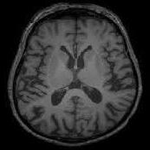

In [19]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps


data = np.ndarray(shape=(1,150, 150, 1), dtype=np.float32)
image = Image.open(f'C:/Users/msi/Desktop/BrainTumorScan-main/BrainTumorScan-main/project/ML_Model/Brain Tumor Data Set/Healthy/Not Cancer  (1631).jpg')
size = (150, 150)
image = ImageOps.grayscale(image)
image = image.resize((150, 150), resample=Image.Resampling.LANCZOS)

image_array = np.asarray(image)
display(image)
#normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data = image_array.reshape((-1,150,150,1))
#data[0] = normalized_image_array

In [20]:
prediction = model.predict(data)
print(prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
0.0


In [21]:
from sklearn.metrics import classification_report

# Tüm validation verisi için tahmin
y_true = val_gen.classes  # Gerçek etiketler
y_pred_probs = model.predict(val_gen, verbose=1)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Binary sınıflandırma için eşik

# Sınıf adlarını al
target_names = list(val_gen.class_indices.keys())

# Raporu yazdır
print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=target_names))




14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step

--- Classification Report ---
              precision    recall  f1-score   support

 Brain Tumor       0.78      0.82      0.80       417
     Healthy       0.81      0.77      0.79       417

    accuracy                           0.80       834
   macro avg       0.80      0.80      0.80       834
weighted avg       0.80      0.80      0.80       834



In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,700,677 (10.30 MB)

 Trainable params: 900,225 (3.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,800,452 (6.87 MB)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

# Giriş görselini hazırla
img_path = "C:/Users/msi/Desktop/BrainTumorScan-main/BrainTumorScan-main/project/ML_Model/Brain Tumor Data Set/Brain Tumor/Cancer (2).jpg"
img = tf.keras.utils.load_img(img_path, target_size=(150, 150), color_mode='grayscale')
img_array = tf.keras.utils.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Son konvolüsyonel katmanın ismini belirle
last_conv_layer_name = "conv2d_1"  # model.summary() ile kontrol et

# Modeli yükle (eğer tanımlı değilse)
from keras.models import load_model
model = load_model("deneme.h5")

# Ara model: konvolüsyonel katman + çıkış
grad_model = tf.keras.models.Model(
    [model.inputs],
    [model.get_layer(last_conv_layer_name).output, model.output]
)

# Grad-CAM hesapla
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    loss = predictions[:, 0]  # Binary sınıflandırma için ilk çıkışı al

# Gradients
grads = tape.gradient(loss, conv_outputs)

# Ortalama gradientler
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Kanal ağırlama işlemi
conv_outputs = conv_outputs[0]
heatmap = conv_outputs * pooled_grads[tf.newaxis, tf.newaxis, :]
heatmap = tf.reduce_sum(heatmap, axis=-1)

# ReLU ve normalizasyon
heatmap = np.maximum(heatmap, 0)
heatmap /= tf.reduce_max(heatmap)

# Görselleştir
heatmap = heatmap.numpy()
heatmap = cv2.resize(heatmap, (150, 150))
heatmap = np.uint8(255 * heatmap)
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Orijinal renkli görüntü ile üst üste bindir
orig_img = cv2.imread(img_path)
orig_img = cv2.resize(orig_img, (150, 150))
superimposed_img = cv2.addWeighted(orig_img, 0.6, heatmap_color, 0.4, 0)

# Göster
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM ile Tümör Tahmini")
plt.axis("off")
plt.show()


AttributeError: The layer sequential has never been called and thus has no defined output.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Grad-CAM görselini hazırlama

heatmap_resized = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))

#  Normalize 
heatmap_uint8 = np.uint8(255 * heatmap_resized)

#  Maske oluştur (sıcak yerleri vurgula)
_, thresh = cv2.threshold(heatmap_uint8, 230, 255, cv2.THRESH_BINARY)
#  Konturları bul
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#  En büyük konturu seç ve bounding box çiz
if contours:
    # En büyük alanlı konturu al
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Orjinal görseli renklendirme için BGR yap
    original_img = np.squeeze(img_array) * 255  # (150, 150)
    original_img = cv2.cvtColor(original_img.astype(np.uint8), cv2.COLOR_GRAY2BGR)
    shrink_ratio = 0.8 

    # Yeni boyutları hesapla
    new_w = int(w * shrink_ratio)
    new_h = int(h * shrink_ratio)

    # Merkeze hizala
    center_x = x + w // 2
    center_y = y + h // 2

    # Yeni köşe koordinatlarını hesapla
    new_x = max(center_x - new_w // 2, 0)
    new_y = max(center_y - new_h // 2, 0)

    # Kutuyu çiz
    boxed_img = cv2.rectangle(original_img.copy(), (new_x, new_y), (new_x + new_w, new_y + new_h), (0, 0, 255), 2)

    # Kutu çiz
    boxed_img = cv2.rectangle(original_img.copy(), (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Görüntüyü göster
    plt.imshow(boxed_img)
    plt.title("Tümör Bölgesi İşaretlendi")
    plt.axis('off')
    plt.show()
else:
    print("Tümör bölgesi bulunamadı.")


error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Argument 'radius' is required to be an integer
>  - Argument 'radius' is required to be an integer
